# Using this notebook one can convert data arrays from SED models to suitable files 1D-Spectra uselful for the MOONS-ETC

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# from PyAstronomy import pyasl
from astropy.table import Table
from astropy.io import fits
import warnings
import os

# Data and CIGALE results

In [8]:
# Data to create the names

data          = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_zCUT_BPT.fits', format='fits')
data          = data[:-1]

galaxy_names = data['id']

In [9]:
def Lobs(Lambda,redshift):
    return (Lambda*(redshift + 1.0))

def flux_lambda(flux_nu, wavelength):
    # Wavelength must be in nm
    # Flux_nu must be in mJy
# #     return((1.0/3.34e4)*(wavelength*10)**-2*(flux_nu*1e-3))
    # Wavelength must be in A
    # Flux_nu must be in mJy
    return((1.0/3.34e4)*(wavelength)**-2*(flux_nu*1e-3))


path_data = '/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/continuum/Salpeter/All_bins/'
# path_data = '/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/continuum/Chabrier/All_bins/'

In [10]:
test = Table.read(path_data+'222172_best_model.fits', format = 'fits')

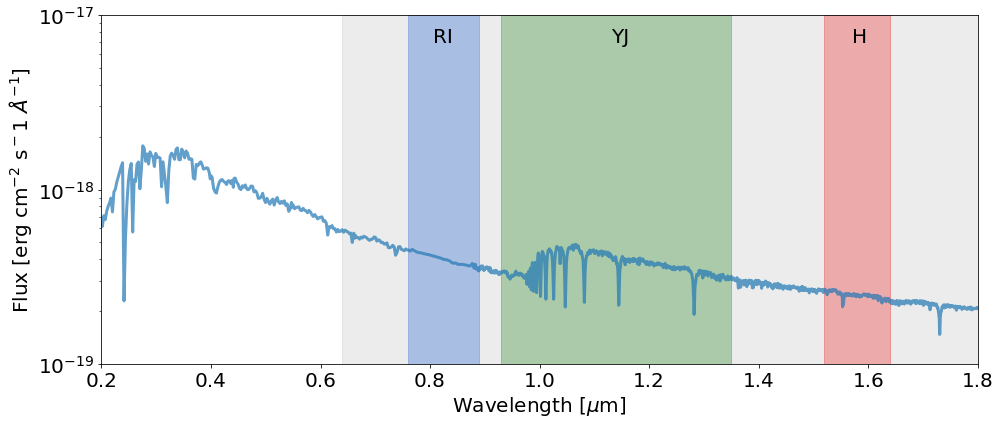

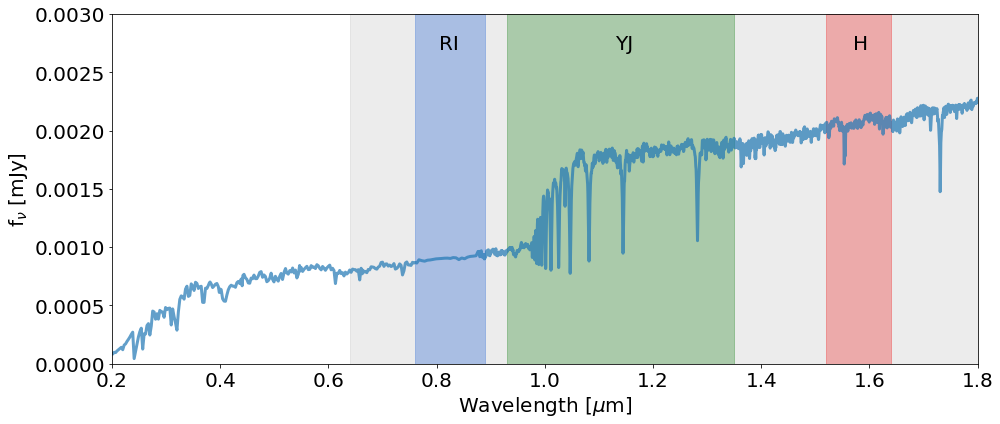

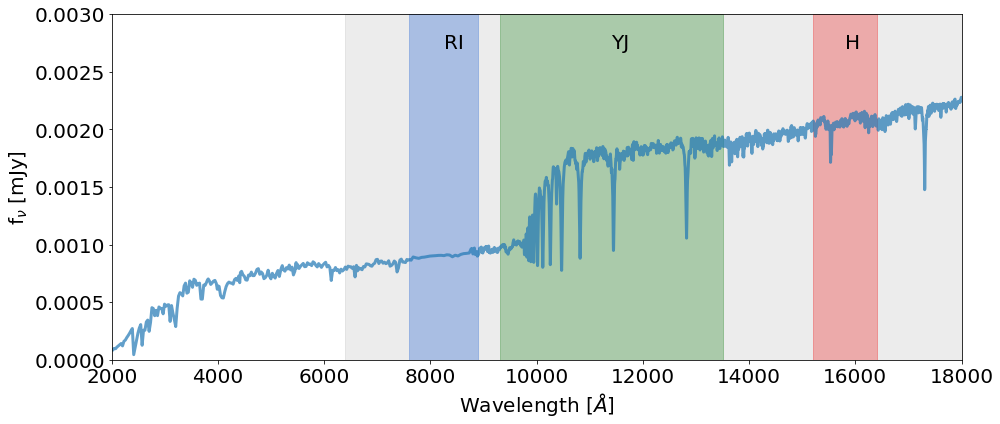

In [11]:
Flux = flux_lambda(test['Fnu'], 10*test['wavelength'])

plt.figure(figsize=(14,6))
plt.plot(test['wavelength']*1e-3, Flux, lw = 3.0, alpha = 0.7)
plt.axvspan(0.7600, 0.8900, alpha=0.5, color='cornflowerblue') # High-resolution coverage
plt.axvspan(0.9300, 1.3500, alpha=0.3, color='green')
plt.axvspan(1.5200, 1.6400, alpha=0.3, color='red')
plt.axvspan(0.6400, 1.8000, alpha=0.15, color='gray')          # Low-resolution coverage
plt.text((0.89+0.76)/2.0-0.02, 7e-18, 'RI', fontsize = 20)
plt.text((0.93+1.35)/2.0-0.01, 7e-18, 'YJ', fontsize = 20)
plt.text((1.52+1.64)/2.0-0.01, 7e-18, 'H', fontsize = 20)
plt.yscale('log')
plt.xlim(0.2, 1.8)
plt.ylim(1e-19, 1e-17)
plt.xlabel('Wavelength [$\mu$m]', fontsize = 20)
plt.ylabel(r'Flux [erg cm$^{-2}$ s${^-1}$ $\AA^{-1}$]', fontsize = 20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)
# plt.legend(frameon = False, prop = {'size': 15}, markerscale = 8, loc = 'upper left')
plt.tight_layout()

plt.figure(figsize=(14,6))
plt.plot(test['wavelength']*1e-3, test['Fnu'], lw = 3.0, alpha = 0.7)
plt.axvspan(0.7600, 0.8900, alpha=0.5, color='cornflowerblue') # High-resolution coverage
plt.axvspan(0.9300, 1.3500, alpha=0.3, color='green')
plt.axvspan(1.5200, 1.6400, alpha=0.3, color='red')
plt.axvspan(0.6400, 1.8000, alpha=0.15, color='gray')          # Low-resolution coverage
plt.text((0.89+0.76)/2.0-0.02, 0.0027, 'RI', fontsize = 20)
plt.text((0.93+1.35)/2.0-0.01, 0.0027, 'YJ', fontsize = 20)
plt.text((1.52+1.64)/2.0-0.01, 0.0027, 'H', fontsize = 20)
plt.xlim(0.2, 1.8)
plt.ylim(0, 3e-3)
plt.xlabel('Wavelength [$\mu$m]', fontsize = 20)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)
# plt.legend(frameon = False, prop = {'size': 15}, markerscale = 8, loc = 'upper left')
plt.tight_layout()

plt.figure(figsize=(14,6))
plt.plot(10*test['wavelength'], test['Fnu'], lw = 3.0, alpha = 0.7)
plt.axvspan(7600, 8900, alpha=0.5, color='cornflowerblue') # High-resolution coverage
plt.axvspan(9300, 13500, alpha=0.3, color='green')
plt.axvspan(15200, 16400, alpha=0.3, color='red')
plt.axvspan(6400, 18000, alpha=0.15, color='gray')          # Low-resolution coverage
plt.text((8900+7600)/2.0-0.02, 0.0027, 'RI', fontsize = 20)
plt.text((9300+13500)/2.0-0.01, 0.0027, 'YJ', fontsize = 20)
plt.text((15200+16400)/2.0-0.01, 0.0027, 'H', fontsize = 20)
plt.xlim(2000, 18000)
plt.ylim(0, 3e-3)
plt.xlabel('Wavelength [$\AA$]', fontsize = 20)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)
# plt.legend(frameon = False, prop = {'size': 15}, markerscale = 8, loc = 'upper left')
plt.tight_layout()

# Several at the same time

In [12]:
few_names     = galaxy_names[::600]
data_redshift = data[::600]

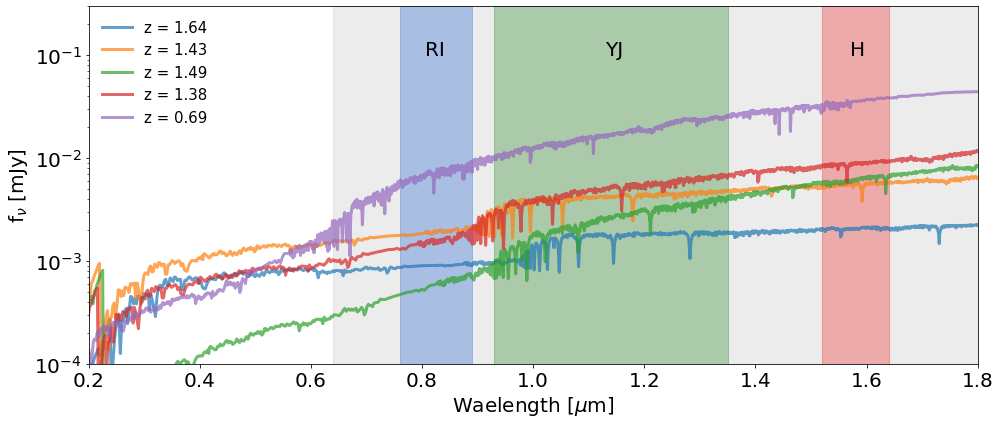

In [13]:
plt.figure(figsize=(14,6))

for i in range(len(few_names)):
    
    spectra = Table.read(path_data+str(few_names[i])+'_best_model.fits', format = 'fits')
    
    plt.plot(spectra['wavelength']*1e-3, spectra['Fnu'], lw = 3.0, alpha = 0.7, label = 'z = %.2f'%(data_redshift['redshift'][i]))
    
plt.axvspan(0.7600, 0.8900, alpha=0.5, color='cornflowerblue') # High-resolution coverage
plt.axvspan(0.9300, 1.3500, alpha=0.3, color='green')
plt.axvspan(1.5200, 1.6400, alpha=0.3, color='red')
plt.axvspan(0.6400, 1.8000, alpha=0.15, color='gray')          # Low-resolution coverage
plt.text((0.89+0.76)/2.0-0.02, 1e-1, 'RI', fontsize = 20)
plt.text((0.93+1.35)/2.0-0.01, 1e-1, 'YJ', fontsize = 20)
plt.text((1.52+1.64)/2.0-0.01, 1e-1, 'H', fontsize = 20)
plt.xlim(0.2, 1.8)
plt.ylim(1e-4, 3e-1)
plt.yscale('log')
plt.xlabel('Waelength [$\mu$m]', fontsize = 20)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 8, loc = 'upper left')
plt.tight_layout()

(0.2, 1.8, 0.0001, 0.3)

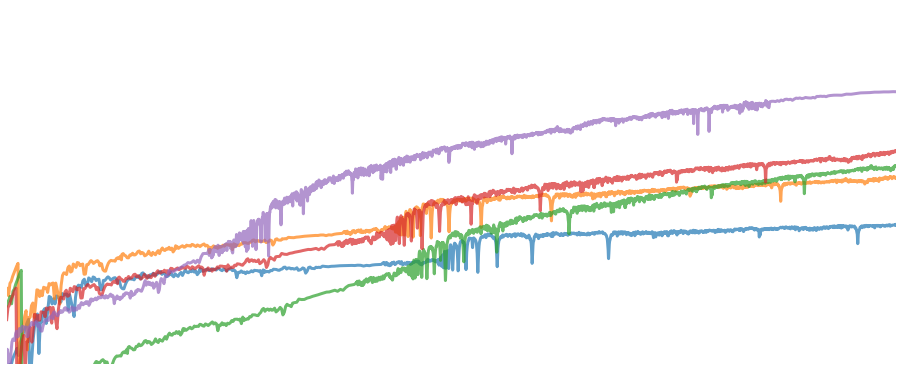

In [14]:
plt.figure(figsize=(14,6))

for i in range(len(few_names)):
    
    spectra = Table.read(path_data+str(few_names[i])+'_best_model.fits', format = 'fits')
    
    plt.plot(spectra['wavelength']*1e-3, spectra['Fnu'], lw = 3.0, alpha = 0.7)
    
# plt.axvspan(0.7600, 0.8900, alpha=0.5, color='cornflowerblue') # High-resolution coverage
# plt.axvspan(0.9300, 1.3500, alpha=0.3, color='green')
# plt.axvspan(1.5200, 1.6400, alpha=0.3, color='red')
# plt.axvspan(0.6400, 1.8000, alpha=0.15, color='gray')          # Low-resolution coverage
# plt.text((0.89+0.76)/2.0-0.02, 1e-1, 'RI', fontsize = 20)
# plt.text((0.93+1.35)/2.0-0.01, 1e-1, 'YJ', fontsize = 20)
# plt.text((1.52+1.64)/2.0-0.01, 1e-1, 'H', fontsize = 20)
plt.xlim(0.2, 1.8)
plt.ylim(1e-4, 3e-1)
plt.yscale('log')
plt.xlabel('Waelength [$\mu$m]', fontsize = 20)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)
# plt.legend(frameon = False, prop = {'size': 15}, markerscale = 8, loc = 'upper left')
plt.tight_layout()
plt.axis('off')
# plt.savefig('/Users/lam/Desktop/Tranparent_1.png', dpi = 300, bbox_inches = 'tight', transparent=True)

In [15]:
path_data_lines = '/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/continuum_lines/metal_1/'
# path_data_lines = '/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/continuum_lines/Chabrier/All_bins/'

In [16]:
few_names = [222172, 231935, 233242]
data_redshift = [1.6365, 1.5875, 1.4640]

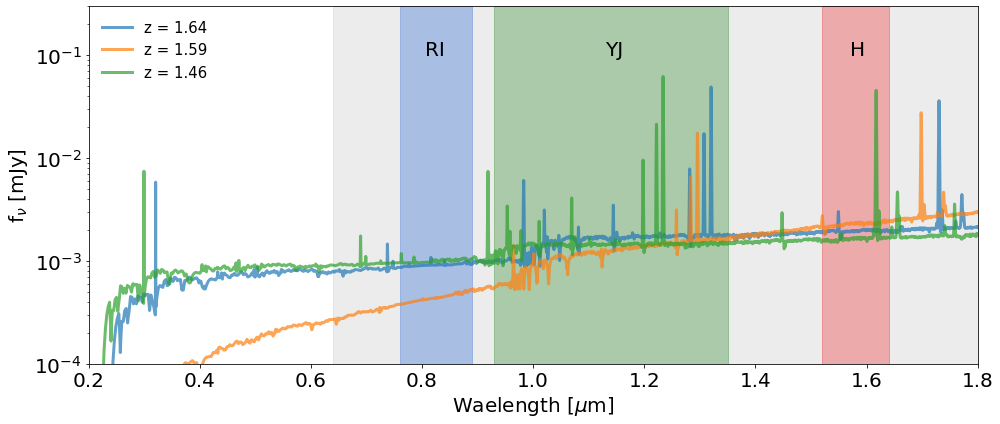

In [17]:
plt.figure(figsize=(14,6))

for i in range(len(few_names)):
    
    spectra = Table.read(path_data_lines+str(few_names[i])+'_best_model.fits', format = 'fits')
    
    plt.plot(spectra['wavelength']*1e-3, spectra['Fnu'], lw = 3.0, alpha = 0.7, label = 'z = %.2f'%(data_redshift[i]))
    
plt.axvspan(0.7600, 0.8900, alpha=0.5, color='cornflowerblue') # High-resolution coverage
plt.axvspan(0.9300, 1.3500, alpha=0.3, color='green')
plt.axvspan(1.5200, 1.6400, alpha=0.3, color='red')
plt.axvspan(0.6400, 1.8000, alpha=0.15, color='gray')          # Low-resolution coverage
plt.text((0.89+0.76)/2.0-0.02, 1e-1, 'RI', fontsize = 20)
plt.text((0.93+1.35)/2.0-0.01, 1e-1, 'YJ', fontsize = 20)
plt.text((1.52+1.64)/2.0-0.01, 1e-1, 'H', fontsize = 20)
plt.xlim(0.2, 1.8)
plt.ylim(1e-4, 3e-1)
plt.yscale('log')
plt.xlabel('Waelength [$\mu$m]', fontsize = 20)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 8, loc = 'upper left')
plt.tight_layout()

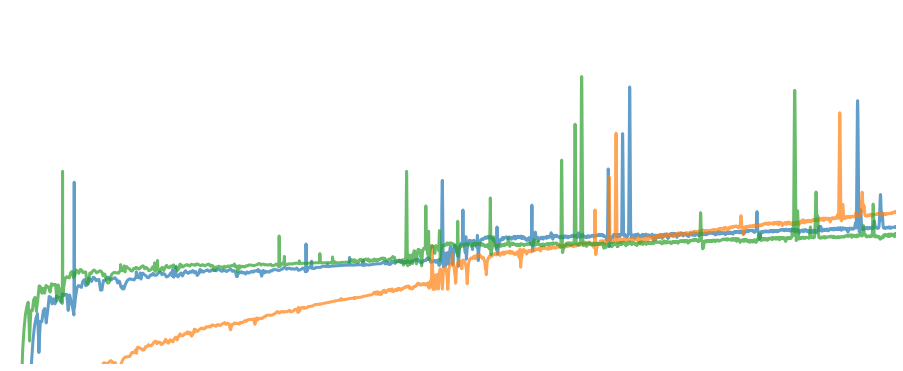

In [19]:
plt.figure(figsize=(14,6))

for i in range(len(few_names)):
    
    spectra = Table.read(path_data_lines+str(few_names[i])+'_best_model.fits', format = 'fits')
    
    plt.plot(spectra['wavelength']*1e-3, spectra['Fnu'], lw = 3.0, alpha = 0.7, label = 'z = %.2f'%(data_redshift[i]))

plt.xlim(0.2, 1.8)
plt.ylim(1e-4, 3e-1)
plt.yscale('log')
plt.xlabel('Waelength [$\mu$m]', fontsize = 20)
plt.ylabel(r'f$_\nu$ [mJy]', fontsize = 20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)
# plt.legend(frameon = False, prop = {'size': 15}, markerscale = 8, loc = 'upper left')
plt.tight_layout()
plt.axis('off')
# plt.savefig('/Users/lam/Desktop/Tranparent_2.png', dpi = 300, bbox_inches = 'tight', transparent=True)